<a href="https://colab.research.google.com/github/osmanaltuna5/PYTHON/blob/main/breast_cancer_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Breast Cancer Analysis with Decision Tree



In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
#new tricks
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


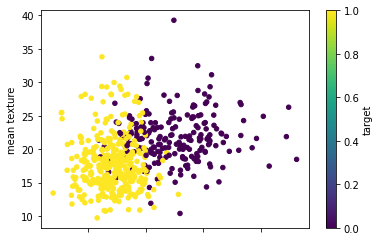

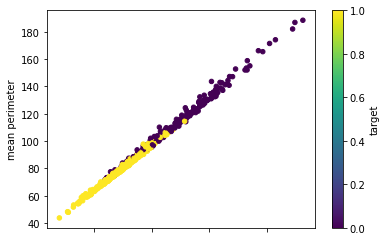

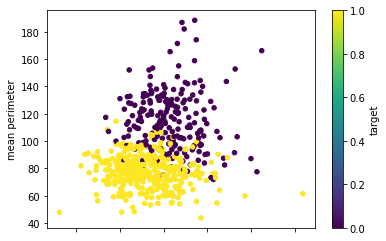

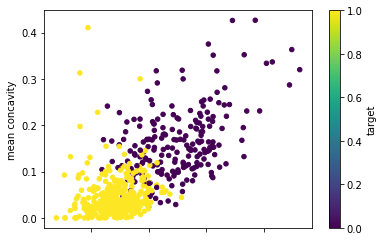

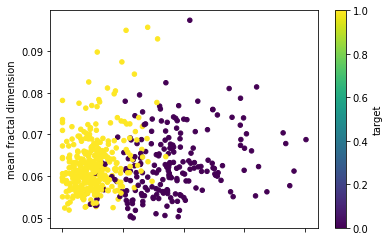

In [ ]:
data = datasets.load_breast_cancer()
breast_cancer_df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])

display(breast_cancer_df)
breast_cancer_df.plot.scatter(x='mean radius',y='mean texture',s=20,c='target',colormap='viridis')
breast_cancer_df.plot.scatter(x='mean radius',y='mean perimeter',s=20,c='target',colormap='viridis')
breast_cancer_df.plot.scatter(x='mean smoothness',y='mean perimeter',s=20,c='target',colormap='viridis')
breast_cancer_df.plot.scatter(x='mean radius',y='mean concavity',s=20,c='target',colormap='viridis')
breast_cancer_df.plot.scatter(x='mean concave points',y='mean fractal dimension',s=20,c='target',colormap='viridis')



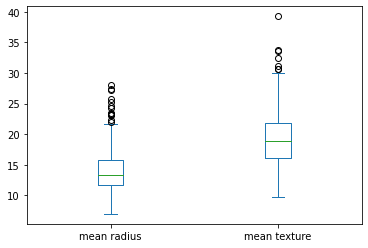

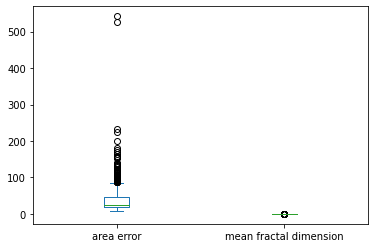

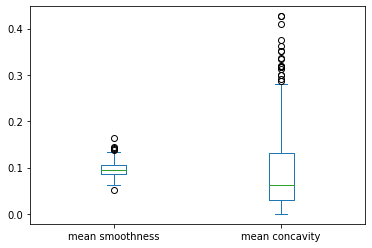

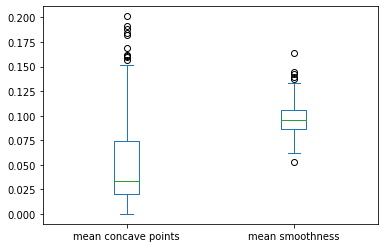

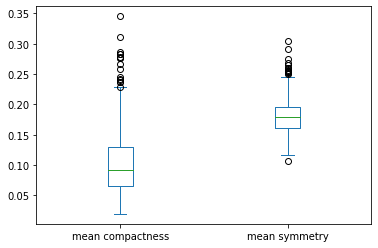

In [ ]:
breast_cancer_df[['mean radius','mean texture']].plot.box()
breast_cancer_df[['area error','mean fractal dimension']].plot.box()
breast_cancer_df[['mean smoothness','mean concavity']].plot.box()
breast_cancer_df[['mean concave points','mean smoothness']].plot.box()
breast_cancer_df[['mean compactness','mean symmetry']].plot.box()


In [ ]:
display(breast_cancer_df)

In [ ]:
train_df, test_df = train_test_split(breast_cancer_df) #default for shuffle is True #75% train is default


In [ ]:
tree = DecisionTreeClassifier(max_depth=10)
tree.fit(train_df.drop('target', axis=1), train_df['target'])


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


DecisionTreeClassifier(max_depth=10)

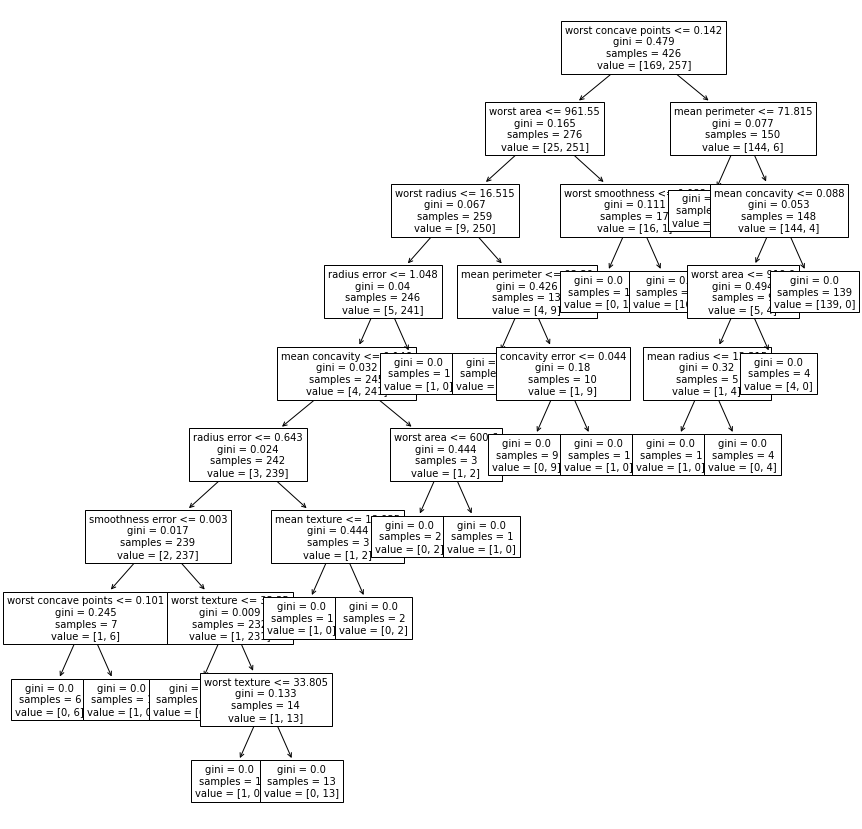

In [ ]:
from sklearn import tree as tr
pyplot.figure(figsize=(15,15))
tr.plot_tree(tree, feature_names=data['feature_names'], fontsize=10)
pyplot.show()

In [ ]:
sum(tree.predict(train_df.drop('target',axis=1))==train_df['target'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


426

In [ ]:
sum(tree.predict(test_df.drop('target',axis=1))==test_df['target'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


131

In [ ]:
# Top 5 features
index_ = 0
f = tree.feature_importances_
for j in range(5):
  index = 0
  temp=0
  for i in f:
    if(temp<i):
      temp=i
      index_ = np.where(tree.feature_importances_==i)
      index_2 = np.where(f==i) 
    index+=1
  f = np.delete(f,index_2) 
  print(data['feature_names'][index_],"-",tree.feature_importances_[index_])


['worst concave points'] - [0.72891711]
['worst area'] - [0.14904518]
['mean perimeter'] - [0.03665661]
['mean concavity'] - [0.01937011]
['radius error'] - [0.01252077]


In [ ]:
lr = LogisticRegression(C=1,max_iter=1000)
lr.fit(train_df.drop(['target'], axis=1),train_df['target']) 
print(sum(lr.predict(train_df.drop('target', axis=1))==train_df['target']), "/",len(train_df['target']))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


412 / 426


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
print(lr.score(test_df.drop('target', axis=1),test_df['target']))
print(tree.score(test_df.drop('target', axis=1),test_df['target']))

0.9370629370629371
0.8811188811188811


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


QUESTİON-2 

In [ ]:

df = pd.read_csv('winequality_white.csv', sep=';')


X_train, X_test, Y_train, Y_test = train_test_split(
    df.drop('quality',axis=1),
    df['quality'], 
    test_size = 0.1,
    random_state=42
)


tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, Y_train)

tree_class = DecisionTreeClassifier()
tree_class.fit(X_train, Y_train)





DecisionTreeClassifier()

In [ ]:
#DecisionTreeRegressor errors

print(mean_squared_error(tree_reg.predict(X_test), Y_test))
print(mean_squared_error(tree_reg.predict(X_train), Y_train))

0.7142857142857143
0.0


In [ ]:
#DecisionTreeClassifier

print(mean_squared_error(tree_class.predict(X_test), Y_test))
print(mean_squared_error(tree_class.predict(X_train), Y_train))


0.7142857142857143
0.0


0.10918808857215567
0.6142857142857143


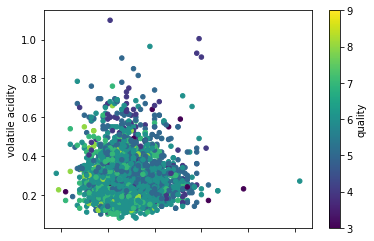

In [ ]:
#Test scores
print(tree_reg.score(X_test, Y_test))
print(tree_class.score(X_test,Y_test))



df.plot.scatter(x='fixed acidity',y='volatile acidity',s=20,c='quality',colormap='viridis')


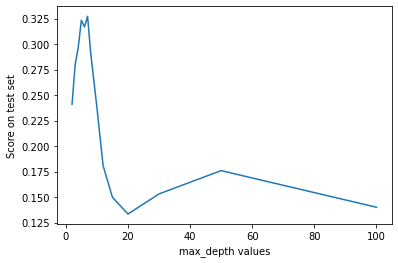

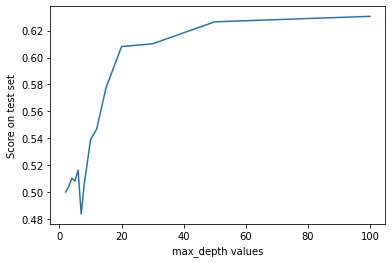

In [ ]:

mdepths = [2, 3, 4, 5, 6, 7, 8, 10, 12, 15, 20, 30, 50, 100]
msamples = [ 2, 3, 5, 9, 10, 15, 30, 50, 100]
errors = np.zeros(14)
index=0
tree_reg.min_samples_split = 6
decision_tree_sets = [tree_reg,tree_class]
for i in decision_tree_sets:
  errors = np.zeros(14)
  index=0
  for d in mdepths:
    i.max_depth = d
    i.fit(X_train,Y_train)
 
    u = i.score(X_test, Y_test)
    
    errors[index]=u
    index+=1

  x = np.array(range(0,11))
  pyplot.plot(mdepths, errors)
  pyplot.xlabel('max_depth values')
  pyplot.ylabel('Score on test set')
  pyplot.show()

If we look at the values ​​in the graphs, the first graph was made with DecisionTreeRegressor and I could not get the desired result. The best value is 0.325 and max_depth between 0-15.The second graph was made with the DecisionTreeClassifier and the success rate increased as the depth number increased. The best ratio is max_depth 100 and the value is between 0.62-0.64

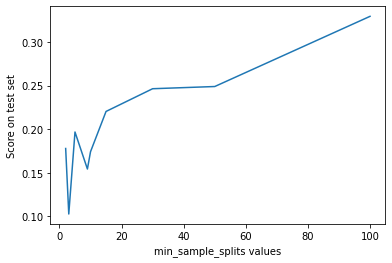

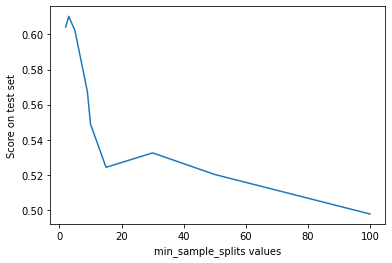

In [ ]:

for i in decision_tree_sets:
  errors = np.zeros(9)
  index=0
  i.max_depth = 100
  for d in msamples:
    i.min_samples_split = d
    i.fit(X_train,Y_train)
 
    u = i.score(X_test, Y_test)
    
    errors[index]=u
    index+=1

  x = np.array(range(0,11))
  pyplot.plot(msamples, errors)
  pyplot.xlabel('min_sample_splits values')
  pyplot.ylabel('Score on test set')
  pyplot.show()

If we look at the values ​​in the graphs, the first graph was made with DecisionTreeRegressor and I could not get the desired result. The best value is 0.325 and min_sample_split between 80-100.The second graph was made with the DecisionTreeClassifier and As the number of min_sample increased, the success rate values ​​increased up to a certain value and then the success rate started to decrease. The best ratio is min_sample_split 0-5 and the value is between 0.62-0.64





In [ ]:
tree_class = DecisionTreeClassifier(min_samples_split=2,max_depth = 100)
tree_class.fit(X_train,Y_train)
tree_class.score(X_test, Y_test)

0.6224489795918368